# Tarea 10: Aplicación Kohonen / K-medias

Realice código en Python que lea una imagen y tome sus pixeles como datos de entrada, de forma que los clasifique en $2 \leq k \leq 32$ clases usando una red de Kohonen. Después, sobrescriba cada pixel de la imagen por el centroide que lo representa. Guarde la nueva imagen.

Repita el ejercicio usando K-medias.

Aplique el código a cada una de las siguientes imágenes con $k=2$, $k=3$ y $k=10$.

Primero, leemos las imágenes.

In [9]:
from PIL import Image
import os
import numpy as np

images = []
names = []
for file in os.listdir("inputs") :
    filename = os.fsdecode(file)
    print(filename)
    if filename.endswith(".jpg") :
        x = Image.open("inputs/" + filename)
        x = np.array(x)
        images.append(x)
        names.append(filename)

k_array = [2, 3, 10]

imagen1Deutschland-1.jpg
imagen2México.jpg
imagen3Gandhi.jpg
imagen4Lauterbrunnen.jpg


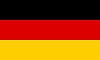

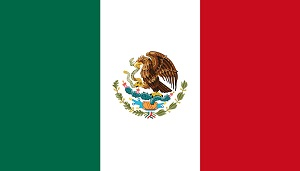

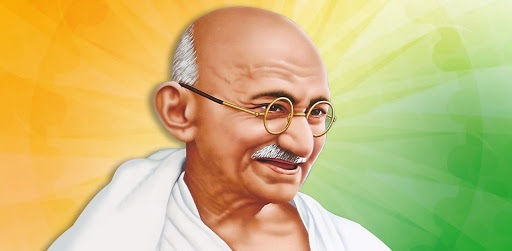

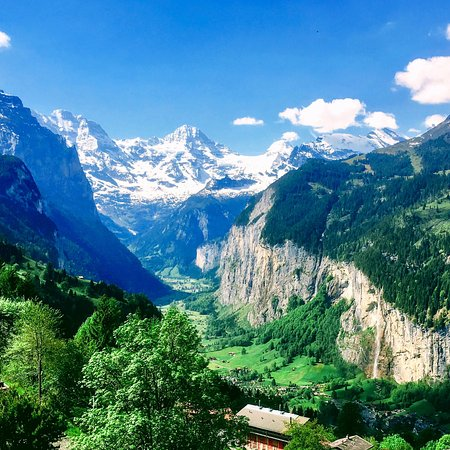

## Kohonen

La implementación del algoritmo de Kohonen es la siguiente:

In [24]:
def kohonen(data, k = 2, centroids = None, max_iters = 50, E = 1e-1) :
    """
    K-means algorithm for n dimensions and k clusters/centroids.
    Parameters
    ----------
    data : np.matrix
        Data to classify.
    k : int, optional
        Amount of clusters/centroids. The default is 2.
    centroids : list of lists / np.matrix, optional
        DESCRIPTION. Starting centroids.
    max_iters : int, optional
        Maximum iterations. The default is 50.

    Returns
    -------
    centroids : np.matrix
        Centroids after the kohonen algorithm finishes.

    """
    m = np.size(data, axis=0)
    if centroids is None :
        centroids = get_random_centroids(data, k)
        
    elif len(centroids) != k :
        AssertionError("Número de centroides no equivale a k")
        
    for i in range(max_iters) :
        old_centroids = centroids.copy()
        rate = 1/(i+2)
        for j in range(m) : # for each sample in the data variable
            assigned_centroid = assign_centroid(data[j,:], centroids)
            centroids[assigned_centroid] = centroids[assigned_centroid]*rate +\
                                           (1-rate)*data[j,:]
        error = sum([np.linalg.norm(centroids[d] - old_centroids[d]) for d in range(k)])
        print("  Generation " + str(i+1) + ". Error: " + str(error))
        if(error < E) : break
    
    return centroids
        
def assign_centroid(data, centroids) :
    """
    Function will calculate the data's distance to the centroids and return
    the index of the pertinent centroid.
    Parameters
    ----------
    data : np.matrix
        Data to classify.
    centroids : np.matrix
        Centroids to use in calculations.

    Returns
    -------
    assigned_centroids : int
        Index of pertinent centroid.

    """    
    dist = []
    for centroid in centroids :
        dist.append((np.linalg.norm(data - centroid)))
    return np.argmin(dist)

def assign_centroids(data, centroids) :
    """
    Function will calculate the data's distance to the centroids and return
    the index of the pertinent centroid.
    Parameters
    ----------
    data : np.matrix
        Data to classify.
    centroids : np.matrix
        Centroids to use in calculations.

    Returns
    -------
    assigned_centroids : list
        Index of pertinent centroid per row in data.

    """
    distances = []
    for centroid in centroids :
        distances.append(np.linalg.norm(data - centroid, axis=1))
    distances = np.column_stack(distances)
    assigned_centroids = np.argmin(distances, axis=1).flatten()
    return assigned_centroids

def get_random_centroids(data, k) :
    """
    Function generates random starting centroids according to the input data's 
    factors ranges.
    Parameters
    ----------
    data : numpy.matrix
        Input data
    k : int
        Amount of clusters/centroids.

    Returns
    -------
    np.matrix
        Randomly generated centroids.

    """
    centroids = []
    columns = np.size(data, axis=1)
    ranges = []
    for i in range(columns) :
        ranges.append([np.min(data[:,i]), np.max(data[:,i])])
    
    for i in range(k) :
        centroid = []
        for span in ranges :
            centroid.append(np.random.uniform(span[0], span[1]))
        centroids.append(centroid)
        
    return np.matrix(centroids)

In [26]:
np.random.seed(25)
for k in k_array :
    for image, name in zip(images, names) :
        print("Working on image: " + name)
        
        # Get image size
        height, width, channels = image.shape
        
        # Flatten height and width and extract a list of all used colors
        colors = np.matrix(image.reshape(height*width, channels))
        
        # Get cluster centroids
        centroids = kohonen(colors, k=k, E=1)
        
        assigned_centroids = assign_centroids(colors, centroids)
        
        # Reassign colors
        for i in range(height*width) :
            colors[i] = centroids[assigned_centroids[i]]
            
        # Write image
        new_image = np.array(colors)
        new_image = new_image.reshape(height, width, channels)
        new_image = Image.fromarray(new_image)
        new_image.save("outputs/kohonen_" + str(k) + "_" + name)
        print("")

Working on image: imagen1Deutschland-1.jpg
  Generation 1. Error: 177.5021939335836
  Generation 2. Error: 152.06906325745553
  Generation 3. Error: 2.842170943040401e-14

Working on image: imagen2México.jpg
  Generation 1. Error: 461.8772846899626
  Generation 2. Error: 3.050623446392407
  Generation 3. Error: 1.5158674442079376
  Generation 4. Error: 0.9060285996453763

Working on image: imagen3Gandhi.jpg
  Generation 1. Error: 407.91869529378187
  Generation 2. Error: 12.9548958505534
  Generation 3. Error: 6.0731104634169455
  Generation 4. Error: 3.5271922304270227
  Generation 5. Error: 2.305429789965001
  Generation 6. Error: 470.96147559267365
  Generation 7. Error: 1.207187078748053
  Generation 8. Error: 0.9322115017620102

Working on image: imagen4Lauterbrunnen.jpg
  Generation 1. Error: 257.32413420714727
  Generation 2. Error: 281.71835568757024
  Generation 3. Error: 287.85617617061735
  Generation 4. Error: 4.536287317731392
  Generation 5. Error: 108.21237506368767
  Ge

  Generation 15. Error: 1909.856213001048
  Generation 16. Error: 1136.801509060242
  Generation 17. Error: 1303.2447883312268
  Generation 18. Error: 1326.5975019307434
  Generation 19. Error: 1483.7462443813984
  Generation 20. Error: 1331.0783936083785
  Generation 21. Error: 1156.764553532486
  Generation 22. Error: 1133.667645925927
  Generation 23. Error: 1426.1647396052867
  Generation 24. Error: 1950.5830292010633
  Generation 25. Error: 1149.051153194342
  Generation 26. Error: 1567.8192300383846
  Generation 27. Error: 1874.4303648935188
  Generation 28. Error: 1651.8439481265777
  Generation 29. Error: 1517.0858186577332
  Generation 30. Error: 1175.3107898912374
  Generation 31. Error: 1522.6272755240257
  Generation 32. Error: 1181.007143510179
  Generation 33. Error: 1104.1900755469637
  Generation 34. Error: 1033.5027685666819
  Generation 35. Error: 1514.1602955628991
  Generation 36. Error: 1203.3743690620902
  Generation 37. Error: 1072.721669233315
  Generation 38. E

2 centroides
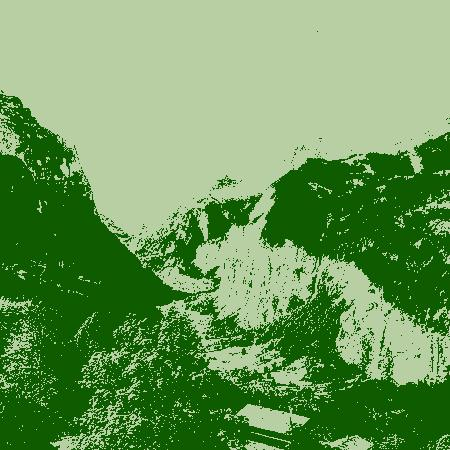

3 centroides
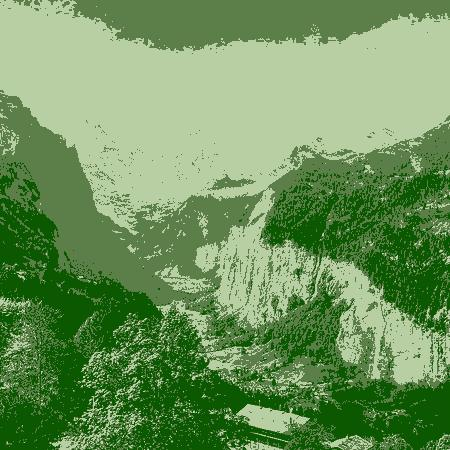

10 centroides
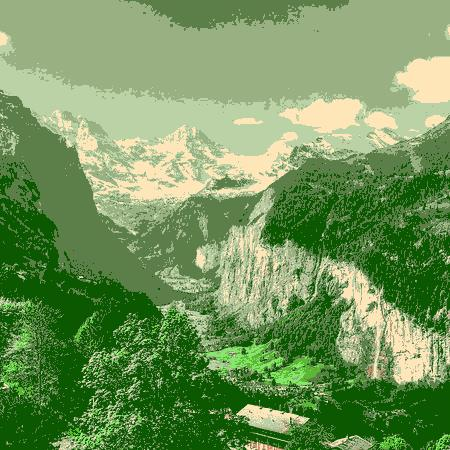

## K-medias

In [27]:
def k_means(data, k = 2, centroids = None, max_iters = 100) :
    """
    K-means algorithm for n dimensions and k clusters/centroids.
    Parameters
    ----------
    data : np.matrix
        Data to classify.
    k : int, optional
        Amount of clusters/centroids. The default is 2.
    centroids : list of lists / np.matrix, optional
        DESCRIPTION. Starting centroids.
    max_iters : int, optional
        Maximum iterations. The default is 100.

    Returns
    -------
    centroids : np.matrix
        Centroids after k-means algorithm finishes.

    """
    if centroids == None :
        centroids = get_random_centroids(data, k)
        
    elif len(centroids) != k :
        AssertionError("Número de centroides no equivale a k")
        
    for i in range(max_iters) :
        old_centroids = centroids
                
        assigned_centroids = assign_centroids(data, centroids)
        
        # Sum the data by cluster
        centroids = [[0]*data.shape[1]] * k
        values_in_centroid = [0] * k

        for i in range(k) :
            assigned_centroids_aux = np.column_stack([assigned_centroids]*data.shape[1])==i
            centroids[i] = np.sum(np.multiply(data, assigned_centroids_aux), axis = 0)
            values_in_centroid[i] = np.sum(assigned_centroids == i)

        # Mean
        for i in range(k) :
            if values_in_centroid[i] > 0 :
                centroids[i] = centroids[i]/values_in_centroid[i]

        centroids = np.stack(centroids, axis=0)

        error = sum([np.linalg.norm(centroids[i] - old_centroids[i]) for i in range(k)])
        if(error < 1e-5) : break
        
    
    return centroids
        



In [28]:
for k in k_array :
    for image, name in zip(images, names) :
        print("Working on image: " + name)
        
        # Get image size
        height, width, channels = image.shape
        
        # Flatten height and width and extract a list of all used colors
        colors = np.matrix(image.reshape(height*width, channels))
        
        # Get cluster centroids
        centroids = k_means(colors, k=k)
        
        
        assigned_centroids = assign_centroids(colors, centroids)
        
        # Reassign colors
        for i in range(height*width) :
            colors[i] = centroids[assigned_centroids[i]]
            
        # Write image
        new_image = np.array(colors)
        new_image = new_image.reshape(height, width, channels)
        new_image = Image.fromarray(new_image)
        new_image.save("outputs/k-means_" + str(k) + "_" + name)

Working on image: imagen1Deutschland-1.jpg
Working on image: imagen2México.jpg
Working on image: imagen3Gandhi.jpg
Working on image: imagen4Lauterbrunnen.jpg
Working on image: imagen1Deutschland-1.jpg
Working on image: imagen2México.jpg
Working on image: imagen3Gandhi.jpg
Working on image: imagen4Lauterbrunnen.jpg
Working on image: imagen1Deutschland-1.jpg
Working on image: imagen2México.jpg
Working on image: imagen3Gandhi.jpg
Working on image: imagen4Lauterbrunnen.jpg


2 centroides
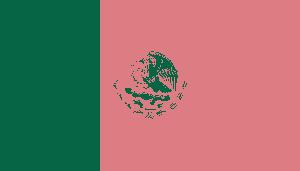

3 centroides
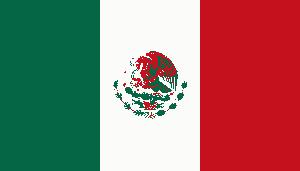

10 centroides
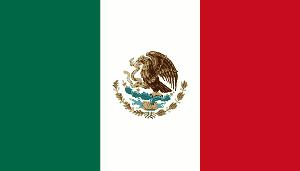

# Conclusión

El algoritmo de Kohonen tardaba mucho más en terminar de organizarse que el algoritmo de K medias vectorizado. En varias ocasiones se tuvo que detener el proceso en una generación, pues todavía se seguía organizando.

Hay ocasiones en las que simplemente no es posible organizar los datos en $k$ centroides. También hay ocasiones en las que los centroides iniciales no atraen ni un solo punto. Por ejemplo:
Para esta imagen (bandera de Alemania) se intentó encontrar 3 centroides. Al final, uno no fue utilizado, pues los otros dos centroides atrayeron todos los puntos.
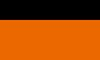